# Perfiles de consumo del PVPC para clientes sin registro horario

## Descarga de CSV's mensuales con los perfiles finales de consumo

En la web de REE están **disponibles para descarga los perfiles finales de consumo**, mediante ficheros CSV comprimidos para cada mes, publicados antes de que transcurran cinco días desde el final del mes de consumo al que se refieren. 
Las correcciones de los datos de demanda, que puedan producirse con posterioridad a la publicación de los perfiles de consumo, serán tenidas en cuenta únicamente a los efectos informativos que correspondan, sin afectar en ningún caso al cálculo de estos perfiles.

link: http://www.ree.es/es/actividades/operacion-del-sistema-electrico/medidas-electricas

Para el año **2017**, se suministran los coeficientes y demanda de referencia para calcular los perfiles iniciales. 
PDF con la última resolución con la demanda de referencia: **[Resolución de 28 de diciembre de 2016 de la Dirección General de Política Energética y Minas (PDF, 2,37 MB)](http://www.ree.es/sites/default/files/01_ACTIVIDADES/Documentos/Documentacion-Simel/resolucion_28122016.pdf)**

## Fichero excel con coeficientes para los perfiles iniciales para 2017:

Establecidos en la resolución anteriormente indicada, disponibles en formato Excel para su consulta en [Demanda de referencia y perfiles iniciales para el año 2017 (XLSX, 705 KB)](http://www.ree.es/sites/default/files/01_ACTIVIDADES/Documentos/Documentacion-Simel/perfiles_iniciales_2017.xlsx)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import pytz
import requests
from urllib.error import HTTPError
# output color
from prettyprinting import *


tz = pytz.timezone('Europe/Madrid')
url_perfiles_2017 = 'http://www.ree.es/sites/default/files/01_ACTIVIDADES/Documentos/Documentacion-Simel/perfiles_iniciales_2017.xlsx'


def _gen_ts(mes, dia, hora, año):
    """Generación de timestamp a partir de componentes de fecha. 
    Ojo al DST y cambios de hora."""
    try:
        return dt.datetime(año, mes, dia, hora - 1) #, tzinfo=tz)
    except ValueError as e:
        print_err('Cambio de hora (día con 25h): "{}"; el 2017-{}-{}, hora={}'.format(e, mes, dia, hora))
        return dt.datetime(2017, mes, dia, hora - 2) #, tzinfo=tz)


def get_data_coeficientes_perfilado_2017(url_perfiles_2017):
    """Extrae la información de las dos hojas del Excel proporcionado por REE 
    con los perfiles iniciales para 2017."""
    # Coeficientes de perfilado y demanda de referencia (1ª hoja)
    cols_sheet1 = ['Mes', 'Día', 'Hora', 
                   'Pa,0m,d,h', 'Pb,0m,d,h', 'Pc,0m,d,h', 'Pd,0m,d,h',
                   'Demanda de Referencia 2017 (MW)']
    perfiles_2017 = pd.read_excel(url_perfiles_2017, header=None, 
                                  skiprows=[0, 1], names=cols_sheet1)
    perfiles_2017['ts'] = [_gen_ts(mes, dia, hora, 2017) 
                           for mes, dia, hora in zip(perfiles_2017.Mes,
                                                     perfiles_2017.Día, 
                                                     perfiles_2017.Hora)]
    # Coefs Alfa, Beta, Gamma (2ª hoja):
    coefs_alpha_beta_gamma = pd.read_excel(url_perfiles_2017, sheetname=1)
    return perfiles_2017.set_index('ts'), coefs_alpha_beta_gamma


# Extracción:
perf_demref_2017, coefs_abg = get_data_coeficientes_perfilado_2017(url_perfiles_2017)
print_info(coefs_abg)
perf_demref_2017.head()

ERROR: Cambio de hora (día con 25h): "hour must be in 0..23"; el 2017-10-29, hora=25
    Categoria a  Categoria b  Categoria c  Categoria d
αi          0.1          0.1          0.1          0.1
βi          0.9          0.5          1.2          0.3
γi          0.9          1.0          1.0          1.0


,Mes,Día,Hora,"Pa,0m,d,h","Pb,0m,d,h","Pc,0m,d,h","Pd,0m,d,h",Demanda de Referencia 2017 (MW)
ts,,,,,,,,
2017-01-01 00:00:00,1,1,1,0.000113,0.000226,0.000086,0.000179,25816.893684
2017-01-01 01:00:00,1,1,2,0.000094,0.000211,0.000081,0.000181,23821.626053
2017-01-01 02:00:00,1,1,3,0.000081,0.000195,0.000079,0.000171,22211.403474
2017-01-01 03:00:00,1,1,4,0.000072,0.000184,0.000077,0.000164,21216.575579
2017-01-01 04:00:00,1,1,5,0.000068,0.000180,0.000076,0.000157,20715.118947


In [2]:
# Conversión de formato de dataframe de perfiles 2017 a finales (para uniformizar):
cols_usar = ['Pa,0m,d,h', 'Pb,0m,d,h', 'Pc,0m,d,h', 'Pd,0m,d,h']
perfiles_2017 = perf_demref_2017[cols_usar].copy()
perfiles_2017.columns = ['COEF. PERFIL {}'.format(p) for p in 'ABCD']
perfiles_2017.head()

,COEF. PERFIL A,COEF. PERFIL B,COEF. PERFIL C,COEF. PERFIL D
ts,,,,
2017-01-01 00:00:00,0.000113,0.000226,0.000086,0.000179
2017-01-01 01:00:00,0.000094,0.000211,0.000081,0.000181
2017-01-01 02:00:00,0.000081,0.000195,0.000079,0.000171
2017-01-01 03:00:00,0.000072,0.000184,0.000077,0.000164
2017-01-01 04:00:00,0.000068,0.000180,0.000076,0.000157


## Descarga de CSV's mensuales con los perfiles finales de consumo

**Archivos CSV**: 'http://www.ree.es/sites/default/files/simel/perff/PERFF_{año}{mes}.gz'

In [3]:
def get_data_perfiles_finales_mes(año, mes=None):
    """Lee el fichero CSV comprimido con los perfiles finales de consumo eléctrico para
    el mes dado desde la web de REE. Desecha columnas de fecha e información de DST.
    
    Introduce (:int: año, :int: mes) o (:datetime_obj: ts)
    """
    mask_ts = 'http://www.ree.es/sites/default/files/simel/perff/PERFF_{:%Y%m}.gz'
    if (type(año) is int) and (mes is not None):
        ts = dt.datetime(año, mes, 1, 0, 0)
    else:
        ts = año
    url_perfiles_finales = mask_ts.format(ts)
    print_info('Descargando perfiles finales del mes de {:%b de %Y} en {}'
               .format(ts, url_perfiles_finales))
    # Intenta descargar perfiles finales, y si falla, recurre a los estimados para 2017:
    try:
        perfiles_finales = pd.read_csv(url_perfiles_finales, sep=';',
                                           encoding='latin_1', compression='gzip'
                                          ).dropna(how='all', axis=1)
    except HTTPError as e:
        print_warn('HTTPError: {}. Se utilizan perfiles estimados de 2017.'.format(e))
        return perfiles_2017[(perfiles_2017.index.year == ts.year) 
                             & (perfiles_2017.index.month == ts.month)]
        
    cols_date = ['MES', 'DIA', 'HORA', 'AÑO']
    zip_date = zip(*[perfiles_finales[c] for c in cols_date])
    perfiles_finales['ts'] = [_gen_ts(*args) for args in zip_date]
    cols_date.append('VERANO(1)/INVIERNO(0)')
    # perfiles_finales['dst'] = perfiles_finales['VERANO(1)/INVIERNO(0)'].astype(bool)
    return perfiles_finales.set_index('ts').drop(cols_date, axis=1)


perfiles_finales_2016_11 = get_data_perfiles_finales_mes(2016, 11)
print_ok(perfiles_finales_2016_11.head())

perfiles_2017_02 = get_data_perfiles_finales_mes(2017, 2)
perfiles_2017_02.head()

Descargando perfiles finales del mes de Nov de 2016 en http://www.ree.es/sites/default/files/simel/perff/PERFF_201611.gz
                     COEF. PERFIL A  COEF. PERFIL B  COEF. PERFIL C  \
ts                                                                    
2016-11-01 00:00:00        0.000087        0.000171        0.000081   
2016-11-01 01:00:00        0.000073        0.000159        0.000076   
2016-11-01 02:00:00        0.000063        0.000150        0.000073   
2016-11-01 03:00:00        0.000059        0.000144        0.000072   
2016-11-01 04:00:00        0.000056        0.000142        0.000072   

                     COEF. PERFIL D  
ts                                   
2016-11-01 00:00:00        0.000160  
2016-11-01 01:00:00        0.000162  
2016-11-01 02:00:00        0.000158  
2016-11-01 03:00:00        0.000154  
2016-11-01 04:00:00        0.000150  
Descargando perfiles finales del mes de Feb de 2017 en http://www.ree.es/sites/default/files/simel/perff/PERFF_2017

,COEF. PERFIL A,COEF. PERFIL B,COEF. PERFIL C,COEF. PERFIL D
ts,,,,
2017-02-01 00:00:00,0.000099,0.000221,0.000084,0.000176
2017-02-01 01:00:00,0.000078,0.000205,0.000081,0.000183
2017-02-01 02:00:00,0.000069,0.000190,0.000080,0.000178
2017-02-01 03:00:00,0.000065,0.000181,0.000079,0.000172
2017-02-01 04:00:00,0.000064,0.000178,0.000079,0.000165


### Descarga de perfiles horarios para un intervalo dado

Con objeto de calcular el precio medio ponderado de aplicación para dicho intervalo.

In [4]:
def extract_perfiles_intervalo(t0, tf):
    t_ini = pd.Timestamp(t0)
    t_fin = pd.Timestamp(tf)
    assert(t_fin > t_ini)
    marca_fin = '{:%Y%m}'.format(t_fin)
    marca_ini = '{:%Y%m}'.format(t_ini)
    if marca_ini == marca_fin:
        perfiles = get_data_perfiles_finales_mes(t_ini)
    else:
        dates = pd.DatetimeIndex(start=t_ini.replace(day=1), 
                                 end=t_fin.replace(day=1), freq='MS')
        perfiles = pd.concat([get_data_perfiles_finales_mes(t) for t in dates])
    return perfiles.loc[t_ini:t_fin].iloc[:-1]

### Estimación de consumo horario a partir de consumo total en un intervalo

 ==> Consumo horario estimado para el intervalo 2016-10-31 -> 2017-01-24, con E=836.916 kWh
Descargando perfiles finales del mes de Oct de 2016 en http://www.ree.es/sites/default/files/simel/perff/PERFF_201610.gz
Descargando perfiles finales del mes de Nov de 2016 en http://www.ree.es/sites/default/files/simel/perff/PERFF_201611.gz
Descargando perfiles finales del mes de Dec de 2016 en http://www.ree.es/sites/default/files/simel/perff/PERFF_201612.gz
Descargando perfiles finales del mes de Jan de 2017 en http://www.ree.es/sites/default/files/simel/perff/PERFF_201701.gz
                     COEF. PERFIL A  COEF. PERFIL B  COEF. PERFIL C  \
ts                                                                    
2016-10-31 00:00:00        0.000070        0.000124        0.000071   
2016-10-31 01:00:00        0.000059        0.000115        0.000069   
2016-10-31 02:00:00        0.000053        0.000111        0.000067   
2016-10-31 03:00:00        0.000051        0.000110        0.000067  

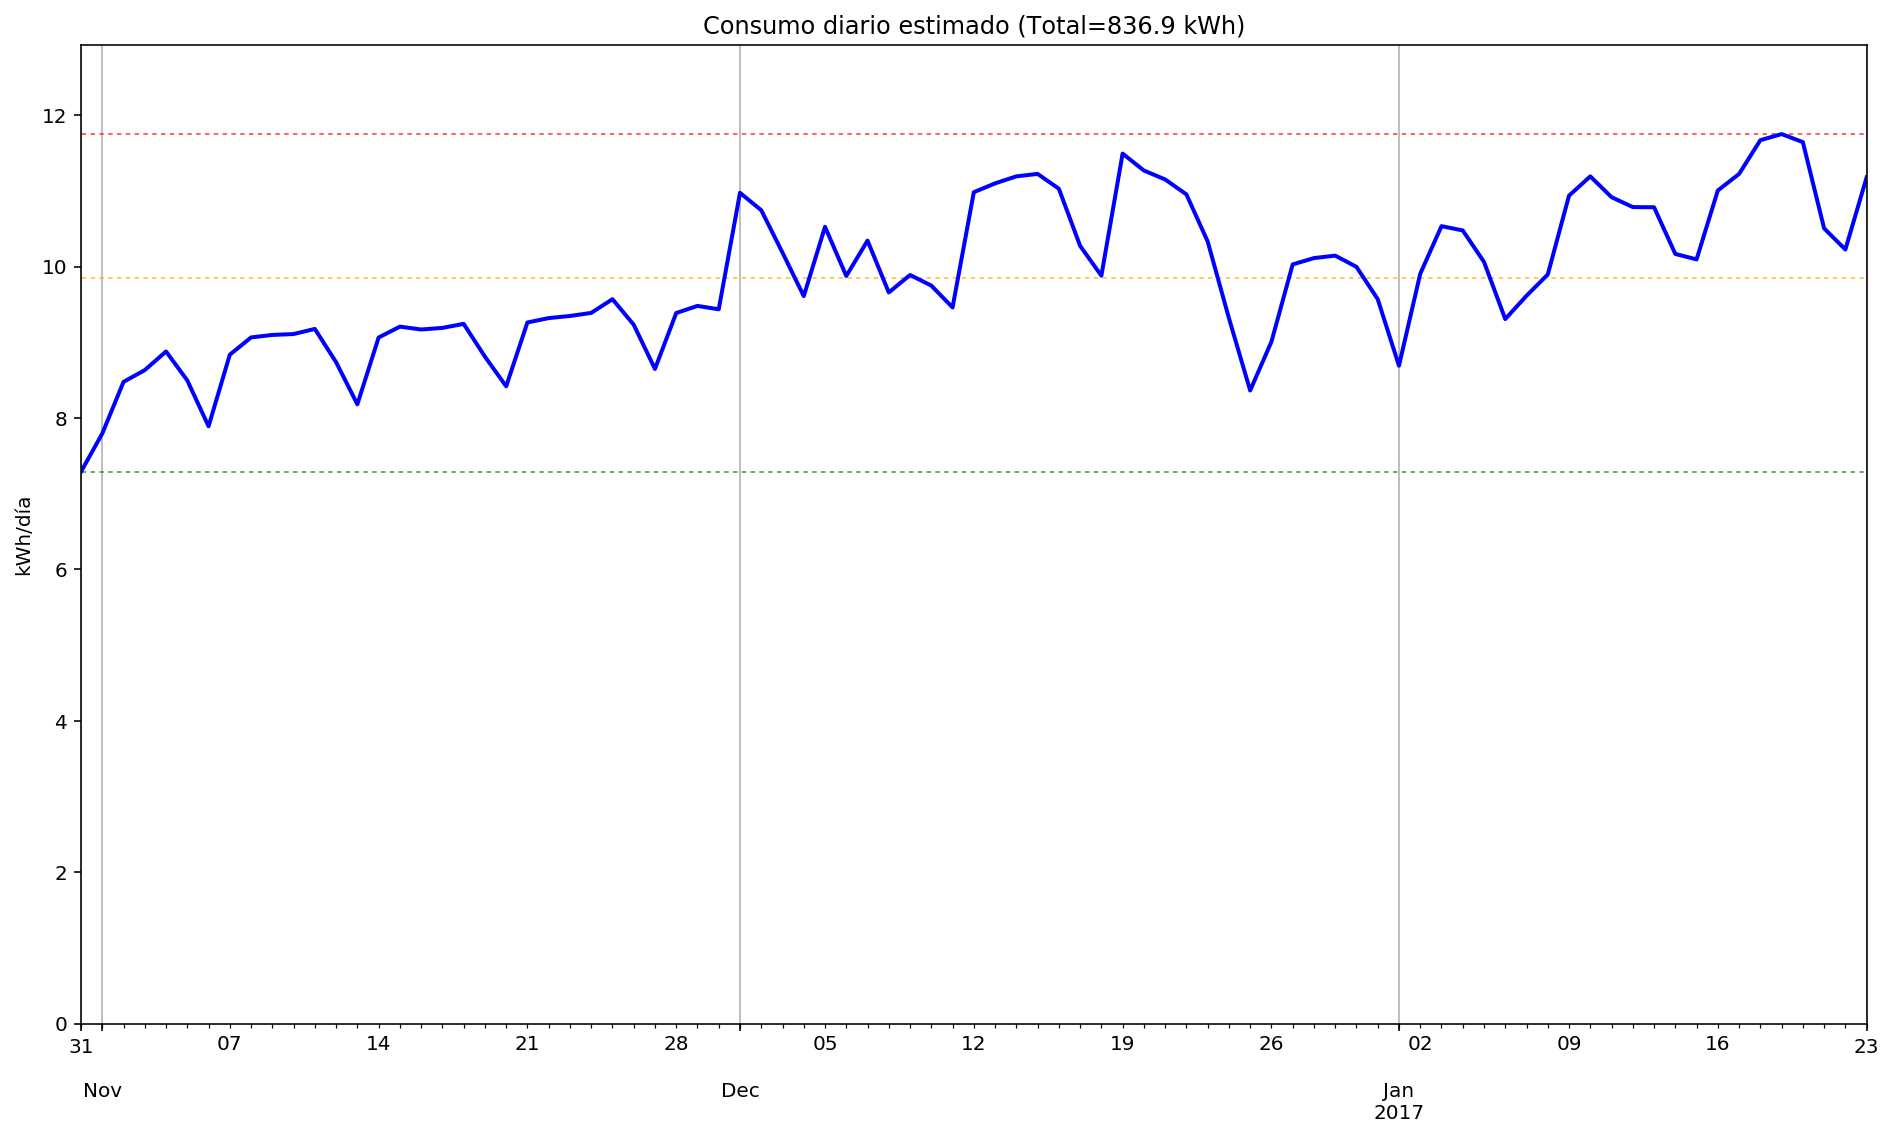

In [5]:
# Ejemplo de generación de valores de consumo horario a partir de consumo total y perfiles de uso:
t0, tf = '2016-10-31', '2017-01-24'
consumo_total_interv_kWh = 836.916
print_secc('Consumo horario estimado para el intervalo {} -> {}, con E={:.3f} kWh'
           .format(t0, tf, consumo_total_interv_kWh))

# perfiles finales:
perfs_interv = extract_perfiles_intervalo(t0, tf)
print_ok(perfs_interv.head())
print_ok(perfs_interv.tail())

# Estimación con perfil A:
suma_perfiles_interv = perfs_interv['COEF. PERFIL A'].sum()
mch_pa = perfs_interv['COEF. PERFIL A'] * consumo_total_interv_kWh / suma_perfiles_interv
consumo_diario_est = mch_pa.groupby(pd.TimeGrouper('D')).sum()
print_red('CHECK CONSUMO TOTAL: {:.3f} == {:.3f} == {:.3f} kWh'
          .format(consumo_total_interv_kWh, consumo_diario_est.sum(), mch_pa.sum()))

# Plot del consumo diario estimado en el intervalo:
print_secc('Consumo horario diario estimado:')
ax = consumo_diario_est.plot(figsize=(16, 9), color='blue', lw=2)
params_lines = dict(lw=1, linestyle=':', alpha=.6)
xlim = consumo_diario_est[0], consumo_diario_est.index[-1]
ax.hlines([consumo_diario_est.mean()], *xlim, color='orange', **params_lines)
ax.hlines([consumo_diario_est.max()], *xlim, color='red', **params_lines)
ax.hlines([consumo_diario_est.min()], *xlim, color='green', **params_lines)
ax.set_title('Consumo diario estimado (Total={:.1f} kWh)'.format(consumo_total_interv_kWh))
ax.set_ylabel('kWh/día')
ax.set_xlabel('')
ax.set_ylim((0, consumo_diario_est.max() * 1.1))
ax.grid('on', axis='x');

In [6]:
# Copia a otro notebook:
pd.DataFrame(mch_pa.rename('kWh')).to_clipboard()

0     9.9
1    10.0
2    10.1
3    10.2
4    10.1
5     9.6
6     9.1
Name: COEF. PERFIL A, dtype: float64


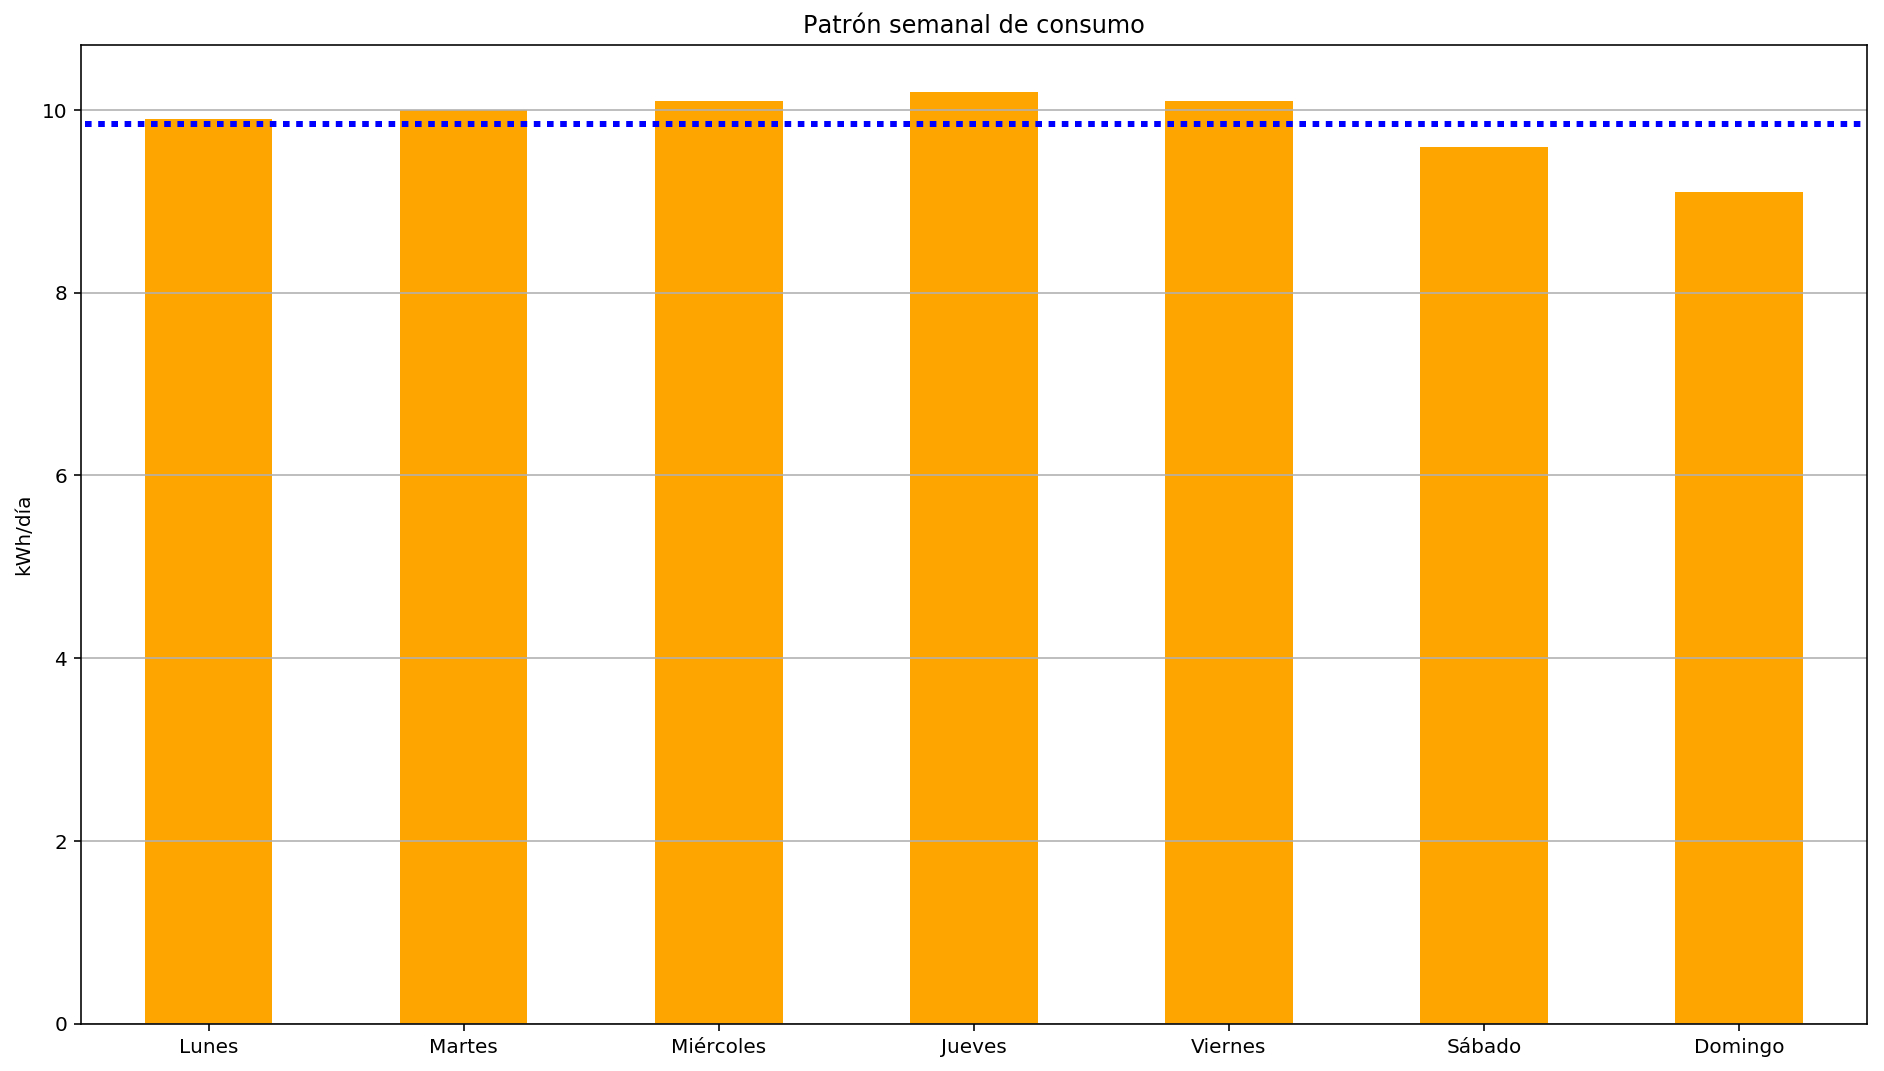

In [7]:
# Consumo medio por día de la semana (patrón semanal de consumo):
media_diaria = mch_pa.groupby(pd.TimeGrouper('D')).sum()
media_semanal = media_diaria.groupby(lambda x: x.weekday).mean().round(1)
días_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
media_semanal.columns = días_semana
print_ok(media_semanal)

ax = media_semanal.T.plot(kind='bar', figsize=(16, 9), color='orange', legend=False)
ax.set_xticklabels(días_semana, rotation=0)
ax.set_title('Patrón semanal de consumo')
ax.set_ylabel('kWh/día')
ax.grid('on', axis='y')
ax.hlines([media_diaria.mean()], -1, 7, lw=3, color='blue', linestyle=':');

In [8]:
# Comprobación de perfiles al cabo del año:
perfiles_2016 = extract_perfiles_intervalo('2016-01-01', '2016-12-31')
print_ok(perfiles_2016.sum())

perfiles_2017.sum()

Descargando perfiles finales del mes de Jan de 2016 en http://www.ree.es/sites/default/files/simel/perff/PERFF_201601.gz
Descargando perfiles finales del mes de Feb de 2016 en http://www.ree.es/sites/default/files/simel/perff/PERFF_201602.gz
Descargando perfiles finales del mes de Mar de 2016 en http://www.ree.es/sites/default/files/simel/perff/PERFF_201603.gz
Descargando perfiles finales del mes de Apr de 2016 en http://www.ree.es/sites/default/files/simel/perff/PERFF_201604.gz
Descargando perfiles finales del mes de May de 2016 en http://www.ree.es/sites/default/files/simel/perff/PERFF_201605.gz
Descargando perfiles finales del mes de Jun de 2016 en http://www.ree.es/sites/default/files/simel/perff/PERFF_201606.gz
Descargando perfiles finales del mes de Jul de 2016 en http://www.ree.es/sites/default/files/simel/perff/PERFF_201607.gz
Descargando perfiles finales del mes de Aug de 2016 en http://www.ree.es/sites/default/files/simel/perff/PERFF_201608.gz
Descargando perfiles finales del

COEF. PERFIL A    1.0
COEF. PERFIL B    1.0
COEF. PERFIL C    1.0
COEF. PERFIL D    1.0
dtype: float64